In this problem there are $n$ prisoners and they can have hats of colors either red or blue. They are placed in a circle such that each can see the other $n − 1$ prisoners.

They must simultaneously guess the color of their own hat and maximize the number of corrct guesses.

In [1]:
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.layers import Flatten, Reshape

Using TensorFlow backend.


In [2]:
def test_accuracy(Q_net):
    number_of_agents = (int(model.layers[0].input.shape[1]) + 2) // 3#len(Q_nets)
    Q = Q_net
    reward = 0
    for ep in range(10000):
        hats = [np.random.randint(2) for i in range(number_of_agents)]
        
        states = [hats[:i] + hats[i+1:] for i in range(number_of_agents)]

        #The Q-Network
        #Take actions in for the agents
        actions = []
        batch = []
        for i in range(number_of_agents):
            state = states[i]

            q_input = [[1, 0] if color == 0 else [0, 1] for color in state]
            q_input += [i * [0] + [1] + (number_of_agents - i - 1) * [0]]
            q_input = [bit for q in q_input for bit in q]
            batch.append(np.reshape(q_input, (-1, 3 * number_of_agents - 2)))#-1, 2 * number_of_agents - 1)) / number_of_agents)

        predictions = model.predict( np.reshape(batch,\
                                            (number_of_agents, 3 * number_of_agents - 2))\
                                    , batch_size=number_of_agents)
        actions = [np.random.randint(2) if np.random.rand(1) < e else p.argmax()\
                   for p in predictions] 
        preds = np.choose(actions, predictions.T)
        actions = list(zip(actions, predictions))


        validate = sum(actions[x][0] == hats[x] for x in range(number_of_agents))
        reward += validate
    return reward / 10000.

In [3]:

number_of_agents = 18

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=3 * number_of_agents - 2))
# model.add(Dense(128, activation='relu'))
model.add(Reshape((1, 128)))
model.add(LSTM(75))

# model.add(Reshape((1, 75)))
#model.add(LSTM(64))
# model.add(Dense((64, 64), activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(40, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
adam = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

rList = []#test_accuracy(model)]

In [4]:
print("There are a total of {0:d} trainable parameters."\
      .format(model.count_params()))
print("The probability of random succes is {0:.2f}."\
      .format(1 - (((number_of_agents - 1) / number_of_agents) ** number_of_agents)))

There are a total of 70698 trainable parameters.
The probability of random succes is 0.64.


In [299]:
# Set learning parameters
e = 0.1
num_episodes = 1 * (10 ** 5)
#create lists to contain total rewards and steps per episode
rAll = 0
limit_cases = 0
for ep in range(num_episodes):
    #initialize hats
    
    hats = [np.random.randint(2) for i in range(number_of_agents)]
    '''Curriculum Learnig approach
    if((sum(hats) <= len(hats) // 2 + 1 and sum(hats) >= len(hats) // 2 - 1)):
        hats = [np.random.randint(2) for i in range(number_of_agents)]
       
    if((sum(hats) <= len(hats) // 2 + 1 and sum(hats) >= len(hats) // 2 - 1)):
        hats = [np.random.randint(2) for i in range(number_of_agents)]
    
    if((sum(hats) <= len(hats) // 2 + 1 and sum(hats) >= len(hats) // 2 - 1)):
        hats = [np.random.randint(2) for i in range(number_of_agents)]
        
    if(sum(hats) <= len(hats) // 2 + 1 and sum(hats) >= len(hats) // 2 - 1):
        limit_cases += 1
    '''
    #print(hats)
    
    #trasform the seen hats into inputs for the network
    states = [hats[:i] + hats[i+1:] for i in range(number_of_agents)]
    

    #The Q-Network
    #Take actions in for the agents
    actions = []
    batch = []
    for i in range(number_of_agents):
        state = states[i] #np.array(states[i]) / number_of_agents #normalize the input
        #print(inputs1[i])
        #print(state)
        
        #one hot encode what the agent sees
#         q_input = [bite for color in state \
#                    for bite in (color * [0] + [1] + (number_of_agents - color - 1) * [0])]
        #apend agent's index
#         q_input += i * [0] + [1] + (number_of_agents - i - 1) * [0]
        

        q_input = [[1, 0] if color == 0 else [0, 1] for color in state]
        q_input += [i * [0] + [1] + (number_of_agents - i - 1) * [0]]
        q_input = [bit for q in q_input for bit in q]
#         print(q_input)
        batch.append(np.reshape(q_input, (-1, 3 * number_of_agents - 2)))#-1, 2 * number_of_agents - 1)) / number_of_agents)
#     break
#     print(batch)
    predictions = model.predict( np.reshape(batch,\
                                            (number_of_agents, 3 * number_of_agents - 2))\
                                , batch_size=number_of_agents)
#     print(predictions)
    
#     action      = predictions[0].argmax()

    actions = [np.random.randint(2) if np.random.rand(1) < e else p.argmax()\
               for p in predictions] 
    preds = np.choose(actions, predictions.T)
#     print([x for x in zip(actions, preds)])
    actions = list(zip(actions, predictions))
#     print(actions)
    
#     if np.random.rand(1) < e:
#         action = np.random.randint(number_of_agents) #env.action_space.sample()
#     actions.append((action, predictions[0]))

        #print(action, predictions, hats)
    
    validate = sum(actions[x][0] == hats[x] for x in range(number_of_agents))
#     r = 0
#     r += 1 if validate >= 1 else 0
    
    r = 2 ** validate - 2 ** (number_of_agents//2 + 1)  
    #r = .1 if r == 1 else 0
    
    targetQ = []
    batch = []
    #update the Q networks
    for i in range(number_of_agents):
        targetQ.append(list(actions[i][1]))
        targetQ[i][actions[i][0]] = r#1 if r == 1 else -10#(2 * r - 1)

#         print(targetQ)

        state = states[i] #np.reshape(np.array(states[i]) / number_of_agents, (-1, number_of_agents - 1))
        #one hot encode what the agent sees
#         q_input = [bite for color in state \
#                    for bite in (color * [0] + [1] + (number_of_agents - color - 1) * [0])]
        #apend agent's index
#         q_input += i * [0] + [1] + (number_of_agents - i - 1) * [0]
        
        q_input = [[1, 0] if color == 0 else [0, 1] for color in state]
        q_input += [i * [0] + [1] + (number_of_agents - i - 1) * [0]]
        q_input = [bit for q in q_input for bit in q]
#         print(q_input)
        batch.append(np.reshape(q_input, (-1, 3 * number_of_agents - 2)))
        
        
    targetQ = np.reshape(targetQ, (number_of_agents, -1))   

#     print(batch)
#     print(hats)
# #     print(actions)
#     print("Guesses:    ",[a[0] for a in actions])
#     print(targetQ)
#     print(np.reshape(batch, (number_of_agents, 3 * number_of_agents - 2)))
    model.fit(np.reshape(batch, (number_of_agents, 3 * number_of_agents - 2))\
              , targetQ, batch_size=number_of_agents, verbose=0)
#         else:
#             ep -= 1
#             continue
#     print("Hats colors:", hats)
#     print("%d blacks" %sum(hats))
#     #print(batch)
#     print("Guesses:    ",[a[0] for a in actions])
#     #print(targetQ)
#     print("Succes:", validate)
#     print("Reward: %d" %r)
#     break   
#     #record rewards
    rAll += validate #* 10
    if(ep % 200 == 199):
        if(ep % 5000 == 4999):
            print("Number of saved agents, after {0:.1f}% of the number of episodes, is {1:.2f}/{2:d};"\
                  .format(100 * ep / num_episodes,\
                          (sum(rList[-19:]) + (rAll / 200. )) / (len(rList[-19:]) + 1),\
                          number_of_agents))
#             print("Got correct {0:d} out of 200.".format(rAll))
#             if(rAll == 200):
#                 print("The model is perfect!")
#                 break
        #Reduce chance of random action as we train the model.
        e = 1./((ep/10) + 10)

        #Updated accuracy
#         rList.append(r)
        
        rList.append((sum(rList[-19:]) + (rAll/200.) ) / (len(rList[-19:]) + 1))

        
#         if(rAll == 200):
#                 print("Accuracy after {0:.1f}% of the number of episodes is {1:.2f};"\
#                   .format(100 * ep / num_episodes, rAll / 200.))
#                 print("The training phases lasted for {0:d} episodes.".format(ep))
#                 print("The model is perfect!")
#                 break
        rAll = 0


Number of saved agents, after 5.0% of the number of episodes, is 10.65/18;
Number of saved agents, after 10.0% of the number of episodes, is 10.74/18;
Number of saved agents, after 15.0% of the number of episodes, is 10.80/18;
Number of saved agents, after 20.0% of the number of episodes, is 10.89/18;
Number of saved agents, after 25.0% of the number of episodes, is 10.93/18;
Number of saved agents, after 30.0% of the number of episodes, is 10.99/18;
Number of saved agents, after 35.0% of the number of episodes, is 11.04/18;
Number of saved agents, after 40.0% of the number of episodes, is 11.08/18;
Number of saved agents, after 45.0% of the number of episodes, is 11.12/18;
Number of saved agents, after 50.0% of the number of episodes, is 11.15/18;
Number of saved agents, after 55.0% of the number of episodes, is 11.18/18;
Number of saved agents, after 60.0% of the number of episodes, is 11.20/18;
Number of saved agents, after 65.0% of the number of episodes, is 11.22/18;
Number of sav

Even if the number of saved agents appeares to increase. The results are obtained on the training set.

The performance on the test appeares to be same as random:

In [305]:
test_accuracy(model)

8.9324999999999992

For training 18 agents (using Q nets), for 100000 episodes,
the number started at: 9.855 and reached: 11.3362166388


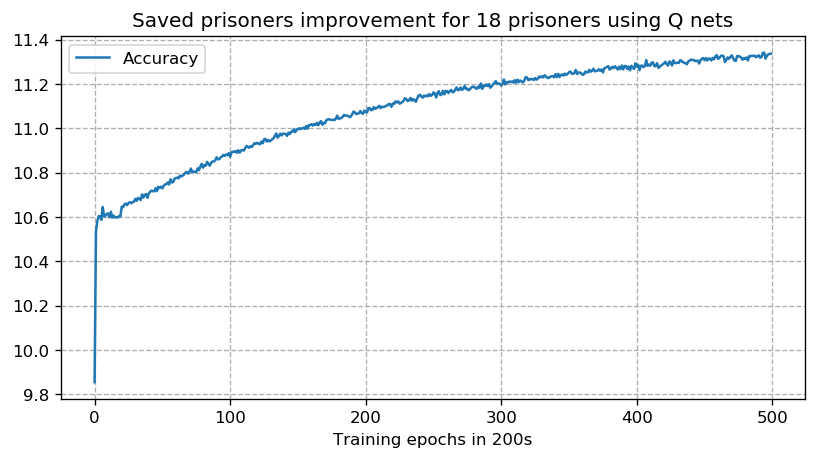

In [303]:
batch_accuracy = rList
plt.figure(figsize=(8, 4), dpi= 120)
plt.axes()
plt.title("Saved prisoners improvement for {0:d} prisoners using Q nets".format(number_of_agents))
plt.plot(batch_accuracy, label = "Accuracy")
plt.yscale("linear")
plt.xlabel("Training epochs in 200s")
plt.legend()
plt.grid(linestyle='--')


print("For training", number_of_agents, "agents (using Q nets), for", num_episodes, "episodes,")
print("the number started at:", batch_accuracy[0], "and reached:", batch_accuracy[-1])